# 最短路問題（ダイクストラ法）

In [1]:
import numpy as np
# 1個ずらして縦につなげば経路ができることを利用する
sp = ['v1', 'v2', 'v3', 'v6', 'v7']
np.array([sp[:-1],sp[1:]]).T

array([['v1', 'v2'],
       ['v2', 'v3'],
       ['v3', 'v6'],
       ['v6', 'v7']], dtype='<U2')

In [2]:
# setはunionで結合可能
T = {('v2', 'v4'), ('v1', 'v2')}
T.union({('v1', 'v3')})

{('v1', 'v2'), ('v1', 'v3'), ('v2', 'v4')}

nodes: {'v4', 'v2', 'v7', 'v6', 'v5', 'v3'}
v: v4
sp: ['v1', 'v2', 'v4']
T: {('v1', 'v2'), ('v2', 'v4')}


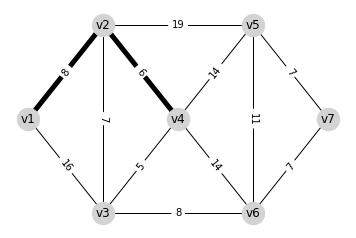

v: v2
sp: ['v1', 'v2']
T: {('v1', 'v2'), ('v2', 'v4')}


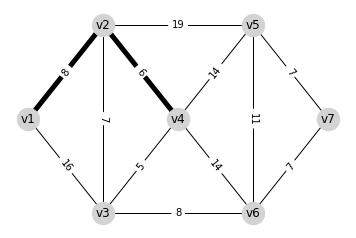

v: v7
sp: ['v1', 'v2', 'v3', 'v6', 'v7']
T: {('v2', 'v3'), ('v3', 'v6'), ('v1', 'v2'), ('v2', 'v4'), ('v6', 'v7')}


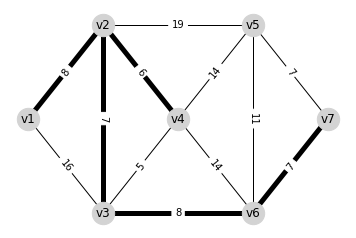

v: v6
sp: ['v1', 'v2', 'v3', 'v6']
T: {('v2', 'v3'), ('v3', 'v6'), ('v1', 'v2'), ('v2', 'v4'), ('v6', 'v7')}


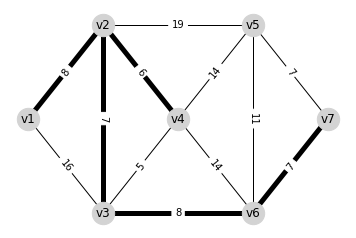

v: v5
sp: ['v1', 'v2', 'v5']
T: {('v2', 'v5'), ('v2', 'v3'), ('v3', 'v6'), ('v1', 'v2'), ('v2', 'v4'), ('v6', 'v7')}


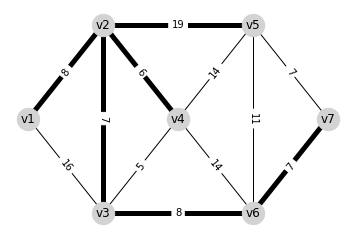

v: v3
sp: ['v1', 'v2', 'v3']
T: {('v2', 'v5'), ('v2', 'v3'), ('v3', 'v6'), ('v1', 'v2'), ('v2', 'v4'), ('v6', 'v7')}


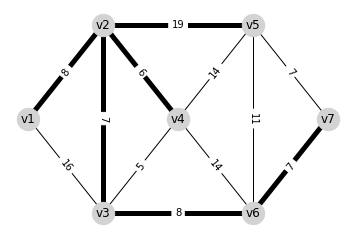

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

weighted_elist = [('v1','v2',8), ('v1','v3',16), ('v2','v3',7), 
                  ('v2','v4',6), ('v2','v5',19), ('v3','v4',5),
                  ('v3','v6',8), ('v4','v5',14), ('v4','v6',14),
                  ('v5','v6',11), ('v5','v7',7), ('v6','v7',7)]
p = {'v1': (0,1),'v2':(1,2),'v3':(1,0),'v4':(2,1),'v5':(3,2),
     'v6':(3,0), 'v7':(4,1)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

# 最短路が決定していない集合
s = 'v1'
nodes = set(G.nodes())-{s}

# 最短路が決定している集合
T = set({})

print('nodes:', nodes)
for v in nodes:
    print('v:', v)
    sp = nx.dijkstra_path(G,s,v)
    print('sp:', sp)
    # setに結合
    T = T.union({tuple(x) for x in np.array([sp[:-1],sp[1:]]).T})
    T1 = list(T)
    print("T:", T)
    
    # 描画
    nx.draw_networkx(G, pos=p, node_color='lightgrey',
                 node_size=500, width=1)
    # 太いエッジを描画
    nx.draw_networkx_edges(G, pos=p, edgelist=T1, width=5)
    nx.draw_networkx_edge_labels(G, pos=p,edge_labels=elbs)
    plt.axis('off')
    plt.show()

# オイラー路
ある頂点からスタートして、すべての枝をちょうど一回ずつ通る道をオイラー路という
* オイラーグラフ：一筆書きで戻ってくることができる：グラフが奇点を持たないことが必要十分条件
* 準オイラーグラフ：一筆書きできる：グラフが奇点をちょうど二つもつことが必要十分条件

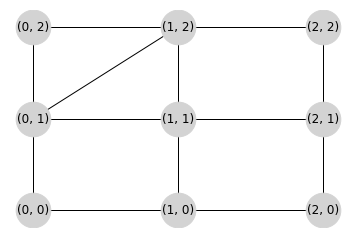

False

In [4]:
# 奇点が2つあるので、オイラーグラフではない(False)
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
GR = nx.grid_2d_graph(3,3)
GR.add_edges_from([((0,1),(1,2))])
nx.draw_networkx(GR,pos={v:v for v in GR.nodes()},
        node_color='lightgrey', node_size=1200, with_labels=True)
plt.axis('off')
plt.show()
nx.is_eulerian(GR)

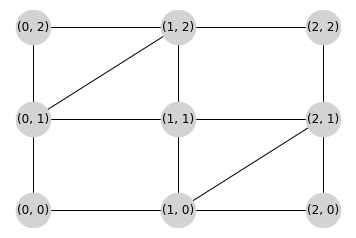

True

In [5]:
# もう一つ追加するとTrueになる
GR.add_edges_from([((1,0),(2,1))])
nx.draw_networkx(GR,pos={v:v for v in GR.nodes()},
        node_color='lightgrey', node_size=1200, with_labels=True)
plt.axis('off')
plt.show()
nx.is_eulerian(GR)

In [6]:
# オイラー閉路を描画
ee = nx.eulerian_circuit(GR)
for (i,j) in ee:
    print(i, end='->')

(0, 0)->(0, 1)->(1, 2)->(2, 2)->(2, 1)->(1, 1)->(1, 2)->(0, 2)->(0, 1)->(1, 1)->(1, 0)->(2, 1)->(2, 0)->(1, 0)->

# 郵便配達人問題

どの点同士を繋げれば、オイラー閉路になるかを考える

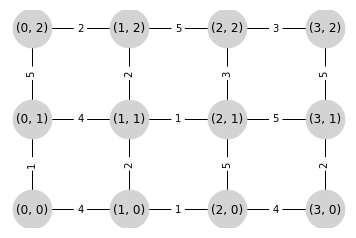

In [7]:
# 問題の作成
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

np.random.seed(1000)

G = nx.grid_2d_graph(4,3)
for (u,v) in G.edges():
    G[u][v]['weight'] = np.random.randint(1,6)

nx.draw_networkx(G, pos={v:v for v in G.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
nx.draw_networkx_edge_labels(G,
    edge_labels={(u,v):G[u][v]['weight'] for (u,v) in G.edges()},
    pos={v:v for v in G.nodes()})
plt.axis('off')
plt.show()

In [8]:
# Gのweightはこのように取得可能
G[(0,0)][(1,0)]

{'weight': 4}

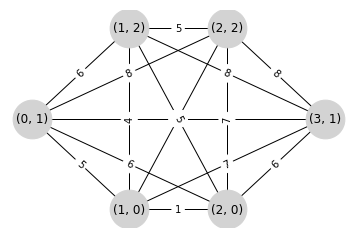

In [9]:
# 奇点間の最短距離を計算

from itertools import combinations

# すべての奇点間の最短路の長さを計算
# dist[vodd1][vodd2] に計算されている．
Vodd = [v for v in G.nodes() if G.degree(v)%2 == 1] # 奇点のみ抽出
dist = dict(nx.all_pairs_dijkstra_path_length(G)) # 全ての組み合わせの最短距離を計算

K = nx.Graph()
K.add_weighted_edges_from([(u,v,dist[u][v])
                           for (u,v) in combinations(Vodd,2)]) # 奇点同士の組み合わせからエッジを取得
nx.draw_networkx(K,pos={v:v for v in K.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
nx.draw_networkx_edge_labels(K,pos={v:v for v in K.nodes()},
    edge_labels={(u,v):K[u][v]['weight'] for (u,v) in K.edges()})
plt.axis('off')
plt.show()

md: {(3, 1): (2, 2), (0, 1): (1, 2), (1, 0): (2, 0)}
mm: [((3, 1), (2, 2)), ((0, 1), (1, 2)), ((1, 0), (2, 0))]


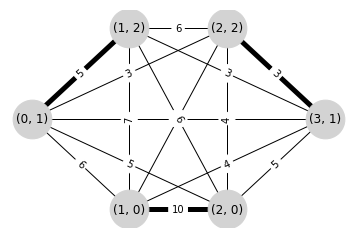

In [10]:
# 修正を加えた
CK = K.copy()
wm = max(CK[u][v]['weight'] for (u,v) in CK.edges())
# 重みの最大値から重みを引いて1を足すと、すべて1より大きくなる
for (u,v) in K.edges():
    CK[u][v]['weight'] = wm - CK[u][v]['weight']+1
# 重み最大マッチングを求める
m = nx.max_weight_matching(CK,maxcardinality=True)
md = dict(m)
print("md:", md)
mm = []
for (u, v) in md.items():
    if (u,v) not in mm and (v,u) not in mm:
        mm.append((u,v))
print("mm:", mm)

nx.draw_networkx(CK,pos={v:v for v in CK.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
nx.draw_networkx_edge_labels(CK,pos={v:v for v in CK.nodes()},
    edge_labels={(u,v):CK[u][v]['weight'] for (u,v) in CK.edges()})
nx.draw_networkx_edges(CK,pos={v:v for v in CK.nodes()},edgelist=mm, width=5)
plt.axis('off')

plt.show()

u,v (3, 1) (2, 2)
dp: [(3, 1), (2, 1), (2, 2)]
ux,uy 3 1
vx,vy 2 1
ux,uy 2 1
vx,vy 2 2
u,v (0, 1) (1, 2)
dp: [(0, 1), (1, 1), (1, 2)]
ux,uy 0 1
vx,vy 1 1
ux,uy 1 1
vx,vy 1 2
u,v (1, 0) (2, 0)
dp: [(1, 0), (2, 0)]
ux,uy 1 0
vx,vy 2 0


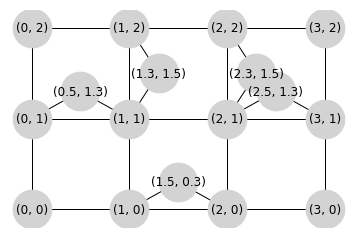

In [11]:
# 求められた重み最大マッチング間の枝を重複させる

CG = G.copy()
for (u,v) in mm:
    # 奇点間の最短経路を計算
    dp = nx.dijkstra_path(CG,u,v)
    print('u,v', u, v)
    print('dp:',dp)
    
    for i in range(len(dp)-1):
        (ux,uy) = dp[i]
        (vx,vy) = dp[i+1]
        print('ux,uy',ux,uy)
        print('vx,vy',vx,vy)
        
        # もし列が同じなら
        if ux == vx:
            wx = ux+0.3 # 0.3列をずらす
            wy = (uy+vy)/2.0
        # もし行が同じなら
        else:
            wx = (ux+vx)/2.0
            wy = uy+0.3 # 0.3 行をずらす
        # 行を追加
        CG.add_edges_from([((ux,uy), (wx,wy)), ((wx,wy), (vx,vy))])
        
nx.draw_networkx(CG,pos={v:v for v in CG.nodes()},
    node_color='lightgrey', node_size=1500, width=1)
plt.axis('off')
plt.show()

In [12]:
# 経路を計算
ec = nx.eulerian_circuit(CG)
for (i,j) in ec:
    print(i, end='->')

(0, 0)->(0, 1)->(0.5, 1.3)->(1, 1)->(1.3, 1.5)->(1, 2)->(2, 2)->(2.3, 1.5)->(2, 1)->(2.5, 1.3)->(3, 1)->(3, 2)->(2, 2)->(2, 1)->(2, 0)->(1.5, 0.3)->(1, 0)->(1, 1)->(1, 2)->(0, 2)->(0, 1)->(1, 1)->(2, 1)->(3, 1)->(3, 0)->(2, 0)->(1, 0)->

# ハミルトン閉路と巡回セールスマン問題
* すべての頂点を通って、戻ってくる路をハミルトン閉路という


In [13]:
from pulp import *
from itertools import product
MEPS = 1.0e-10

def TSPSolveSubtourElim(G,x,y):
    n = len(G.nodes())
    nodes = list(G.nodes())
    # すべての頂点間にエッジを作成
    edges = [(nodes[i],nodes[j]) for  (i,j) in product(range(n), range(n))
             if nodes[i] < nodes[j]]
    # 距離行列を計算
    D = np.sqrt((x.reshape(-1,1)-x)**2 + (y.reshape(-1,1)-y)**2)

    # 問題設定
    prob = LpProblem('TSP',LpMinimize)
    x = {(u,v): LpVariable('x'+str(u)+","+str(v),
        lowBound=0,cat='Binary') for (u, v) in edges}
    # 目的関数を設定
    prob += lpSum(D[i, j]*x[i, j] for (i,j) in edges)
    # 制約の設定
    for i in nodes:
        ss = [(j,i) for j in nodes if (j,i) in edges]+[(i,j) for j in nodes if (i,j) in edges]
        prob += lpSum(x[e] for e in ss) == 2, 'Eq'+str(i)

    prob.solve()
    
    # 部分巡回路の箱を作成
    subtours = []
    
    # 接続されている組み合わせからエッジを作成
    for (i,j) in edges:
        if x[i,j].varValue > MEPS:
            subtours.append([i,j])
    G.add_edges_from(subtours)
    
    # 回路が何個あるか計算
    CC = list(nx.connected_components(G))
    
    # 1より大きければ制約を加えて再度計算
    while len(CC) > 1:
        for S in CC: # CC は巡回路のリスト
            # 制約追加
            prob += lpSum(x[i,j] for (i,j) in edges
                          if i in S and j in S) <= len(S)-1
        prob.solve()
        
        # 巡回路を更新
        G.remove_edges_from(subtours)
        subtours = []
        for (i,j) in edges:
            if x[i,j].varValue > MEPS:
                subtours.append([i,j])
        G.add_edges_from(subtours)
        
        # 巡回路リストを更新
        CC = list(nx.connected_components(G))
        print("CC:", CC)
        
        # 描画
        nx.draw_networkx(Tours,pos=p,node_color='k',node_size=10, with_labels=False)
        plt.axis('off')
        plt.show()
    
    # 目的関数を計算
    len_tour = 0
    for (u,v) in G.edges():
        len_tour += D[u,v]

    return len_tour

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# n点からなるグラフの作成
n = 100
vlist = [i for i in range(n)]
Tours = nx.Graph()
Tours.add_nodes_from(vlist)

np.random.seed(1234)
x = np.random.randint(low=0, high=1000, size=n)
y = np.random.randint(low=0, high=1000, size=n)
p = {i: (x[i],y[i]) for i in range(n)}

In [15]:
# このように計算すると距離行列が求まる
D = np.sqrt((x.reshape(-1,1)-x)**2 + (y.reshape(-1,1)-y)**2)
print(D)

[[  0.         176.81911661 623.22146946 ... 746.50117214 716.24716404
  396.01136347]
 [176.81911661   0.         469.59770016 ... 608.5992113  606.87148557
  230.55585007]
 [623.22146946 469.59770016   0.         ... 162.59458786 784.8598601
  414.83731751]
 ...
 [746.50117214 608.5992113  162.59458786 ...   0.         943.15746299
  576.63940205]
 [716.24716404 606.87148557 784.8598601  ... 943.15746299   0.
  425.28225921]
 [396.01136347 230.55585007 414.83731751 ... 576.63940205 425.28225921
    0.        ]]


CC: [{0, 2, 4, 5, 6, 8, 9, 13, 14, 15, 16, 18, 19, 22, 23, 24, 25, 26, 28, 29, 30, 31, 35, 37, 38, 39, 40, 43, 46, 49, 50, 51, 53, 56, 57, 58, 59, 60, 62, 63, 64, 67, 70, 71, 72, 73, 79, 80, 82, 83, 85, 86, 87, 88, 90, 91, 92, 93, 94, 96}, {32, 1, 66, 99, 69, 7, 41, 42, 74, 77, 17, 52, 89}, {75, 3, 12, 78}, {10, 11, 55, 47}, {97, 20, 84}, {98, 36, 48, 21, 61}, {34, 68, 44, 81, 27, 95}, {65, 33, 76, 45, 54}]


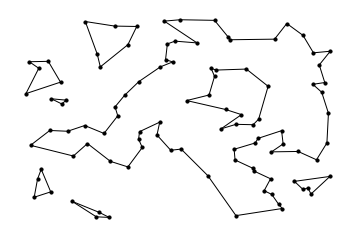

CC: [{0, 67, 71, 49, 60, 63}, {1, 8, 13, 15, 16, 17, 18, 22, 25, 26, 28, 29, 31, 35, 39, 43, 51, 52, 57, 64, 66, 69, 70, 73, 74, 77, 79, 80, 82, 83, 85, 86, 87, 91, 92, 94, 96, 98}, {88, 2, 23}, {3, 4, 38, 40, 9, 10, 75, 12, 11, 78, 46, 14, 47, 55, 24, 90, 62}, {34, 68, 5, 37, 6, 72, 59, 44, 81, 50, 19, 53, 56, 58, 27, 93, 30, 95}, {32, 99, 7, 41, 42, 89}, {65, 97, 33, 76, 45, 20, 84, 54}, {48, 61, 36, 21}]


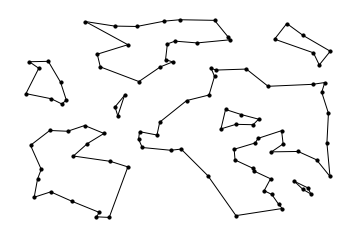

CC: [{0, 1, 8, 16, 17, 18, 21, 22, 25, 26, 28, 29, 35, 36, 48, 49, 51, 52, 57, 60, 61, 63, 64, 66, 67, 69, 70, 71, 74, 77, 79, 80, 83, 85, 86, 87, 91, 96, 98}, {2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 19, 20, 23, 24, 27, 30, 33, 34, 37, 38, 40, 44, 45, 46, 47, 50, 53, 54, 55, 56, 58, 59, 62, 65, 68, 72, 75, 76, 78, 81, 84, 88, 90, 93, 95, 97}, {89, 41, 99, 7}, {32, 39, 73, 42, 43, 13, 15, 82, 92, 94, 31}]


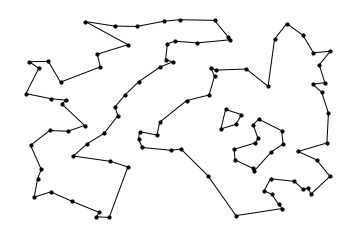

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99}, {39, 73, 43, 13, 15, 82, 92, 94, 31}]


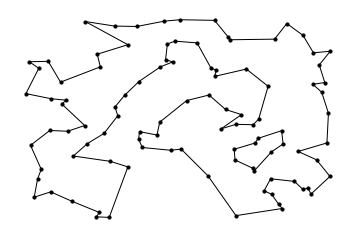

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, {8, 57, 79}]


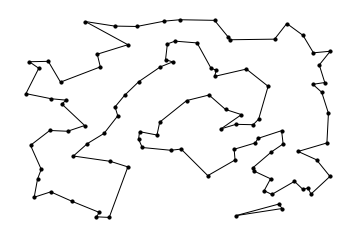

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99}, {39, 73, 43, 13, 15, 16, 82, 92, 94, 31}]


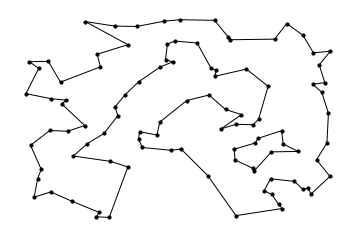

CC: [{0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 17, 19, 20, 23, 24, 25, 27, 30, 33, 34, 37, 38, 40, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 75, 76, 78, 81, 84, 85, 87, 88, 90, 93, 95, 97}, {7, 8, 13, 15, 16, 18, 21, 22, 26, 28, 29, 31, 32, 35, 36, 39, 41, 42, 43, 48, 51, 57, 61, 64, 73, 74, 77, 79, 80, 82, 83, 86, 89, 91, 92, 94, 96, 98, 99}]


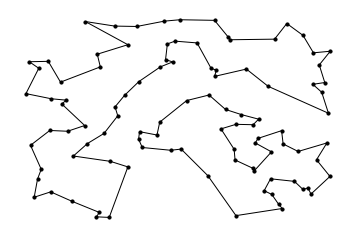

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 23, 24, 25, 27, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99}, {73, 43, 16, 82, 94, 31}, {80, 18, 51, 22, 26, 28, 29}]


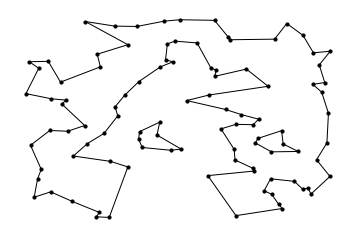

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 90, 91, 93, 95, 96, 97, 98, 99}, {32, 73, 41, 42, 43, 13, 82, 89, 94, 31}, {92, 39, 15}]


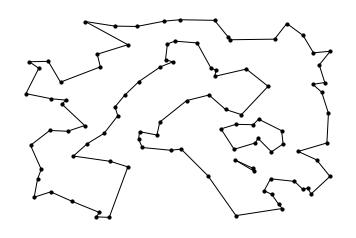

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99}, {98, 36, 48, 83, 21, 61}]


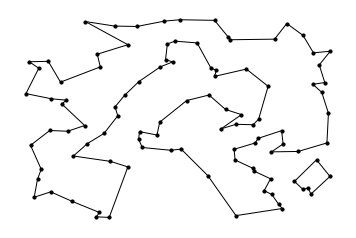

CC: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}]


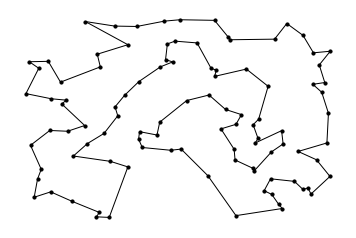

8113.031288916021

In [16]:
# 計算
TSPSolveSubtourElim(Tours, x, y)

# 最大流問題

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edge(1,2,capacity=4); G.add_edge(1,3,capacity=5); 
G.add_edge(2,3,capacity=2); G.add_edge(2,4,capacity=2); 
G.add_edge(3,4,capacity=2); G.add_edge(3,5,capacity=3); 
G.add_edge(4,5,capacity=4); G.add_edge(4,6,capacity=3); 
G.add_edge(5,6,capacity=5);

In [18]:
val, flowdict = nx.maximum_flow(G,1,6)
print('maxflow:', val)
for u,v in G.edges():
    print((u,v),':',flowdict[u][v])

maxflow: 7
(1, 2) : 2
(1, 3) : 5
(2, 3) : 0
(2, 4) : 2
(3, 4) : 2
(3, 5) : 3
(4, 5) : 1
(4, 6) : 3
(5, 6) : 4


In [19]:
# これは最小カットを求めても同じ結果になる
nx.minimum_cut(G,1,6)

(7, ({1, 2, 3}, {4, 5, 6}))

# 最小費用流問題

In [20]:
import networkx as nx
G = nx.DiGraph()
G.add_node('a', demand = -8); G.add_node('b', demand = 0);
G.add_node('c', demand = -2); G.add_node('d', demand = 10);
G.add_edge('a', 'b', weight = 3, capacity = 3)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 6)
G.add_edge('c', 'd', weight = 4, capacity = 10)
G.add_edge('c', 'b', weight = 2, capacity = 5)
flowDict = nx.min_cost_flow(G)
print(flowDict)

{'a': {'b': 3, 'c': 5}, 'b': {'d': 6}, 'c': {'d': 4, 'b': 3}, 'd': {}}
